# Creating the model for the hello world example

Formally the tensorflow model has been created through the notebook _create_sine_model.ipynb_. This notebook has been abandoned  and replaced by a Python file named _train.py_.
Unfortunately this makes the process of creating the model more obscure.
I therefore created this new notebook trying to follow _train.py_ step be step and plotting intermediate results.
The functions have been copy/pasted from train.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   # disable tensorflow warnings
import tensorflow as tf
print("Tensorflow version: ",tf.__version__)


Tensorflow version:  2.15.0


In [2]:
def get_data():
  """
  The code will generate a set of random `x` values,calculate their sine
  values.
  """
  # Generate a uniformly distributed set of random numbers in the range from
  # 0 to 2π, which covers a complete sine wave oscillation
  x_values = np.random.uniform(low=0, high=2 * math.pi,
                               size=1000).astype(np.float32)

  # Shuffle the values to guarantee they're not in order
  np.random.shuffle(x_values)

  # Calculate the corresponding sine values
  y_values = np.sin(x_values).astype(np.float32)

  return (x_values, y_values)

In [3]:
x_values,y_values = get_data()

Plot the values returned from get_data. The x and y values are shuffled. The first plot shows the sequence of x values. You see the random sequence of the values between 0 and $2\pi$. 1000 values are plotted.

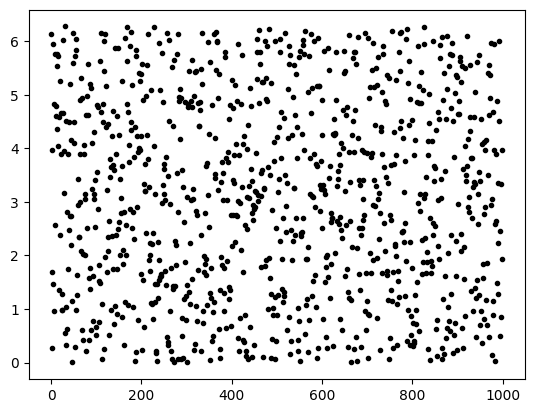

In [4]:
plt.plot(x_values,'k.')

The next plot shows the sine curve

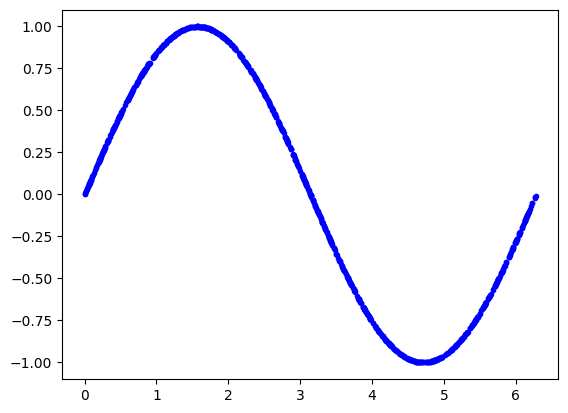

In [5]:
plt.plot(x_values, y_values,'b.')

In [6]:
def create_model() -> tf.keras.Model:
  model = tf.keras.Sequential()

  # First layer takes a scalar input and feeds it through 16 "neurons". The
  # neurons decide whether to activate based on the 'relu' activation function.
  model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1, )))

  # The new second and third layer will help the network learn more complex
  # representations
  model.add(tf.keras.layers.Dense(16, activation='relu'))

  # Final layer is a single neuron, since we want to output a single value
  model.add(tf.keras.layers.Dense(1))

  # Compile the model using the standard 'adam' optimizer and the mean squared
  # error or 'mse' loss function for regression.
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])

  return model


Now we create the model and we train it for 500 epochs using the x_values and y_values returned from get_data()

In [7]:
model = create_model()
epochs=500
model.fit(x_values,
            y_values,
            epochs=epochs,
            validation_split=0.2,
            batch_size=64,
            verbose=2)

Epoch 1/500


InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 519, in dispatch_queue

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 508, in process_one

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 368, in execute_request

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 455, in do_execute

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 577, in run_cell

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/tmp/ipykernel_5771/3714779315.py", line 3, in <module>

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_920]

In [ ]:
model_dir = "/tmp/hello_world_model"
model.save(model_dir, save_format="tf")

Print the mode summary

Plot the model structure

In [ ]:
print(model.summary())

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

Convert the model to tflite format

In [ ]:
def convert_tflite_model(model):
  """Convert the save TF model to tflite model, then save it as .tflite flatbuffer format
    Args:
        model (tf.keras.Model): the trained hello_world Model
    Returns:
        The converted model in serialized format.
  """
  converter = tf.lite.TFLiteConverter.from_keras_model(model)
  tflite_model = converter.convert()
  return tflite_model


In [ ]:
tflite_model = convert_tflite_model(model)

Finally we save the model converted to tflite

In [ ]:
def save_tflite_model(tflite_model, save_dir, model_name):
  """save the converted tflite model
  Args:
      tflite_model (binary): the converted model in serialized format.
      save_dir (str): the save directory
      model_name (str): model name to be saved
  """
  if not os.path.exists(save_dir):
    os.makedirs(save_dir)
  save_path = os.path.join(save_dir, model_name)
  print("Saving ",model_name," to folder ",save_dir)
  with open(save_path, "wb") as f:
    f.write(tflite_model)


In [ ]:
save_tflite_model(tflite_model,
                    model_dir,
                    model_name="hello_world_float.tflite")


## Quantization to minimize the size of the model
The type of the values in the model is changed from float to int8

In [ ]:
def convert_quantized_tflite_model(source_model_dir, x_values):
  """Convert the save TF model to tflite model, then save it as .tflite
    flatbuffer format

    Args:
        source_model_dir (tf.keras.Model): the trained hello_world flaot Model dir
        x_train (numpy.array): list of the training data

    Returns:
        The converted model in serialized format.
  """

  # Convert the model to the TensorFlow Lite format with quantization
  def representative_dataset(num_samples=500):
    for i in range(num_samples):
      yield [x_values[i].reshape(1, 1)]

  converter = tf.lite.TFLiteConverter.from_saved_model(source_model_dir)
  converter.optimizations = [tf.lite.Optimize.DEFAULT]
  converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
  converter.inference_input_type = tf.int8
  converter.inference_output_type = tf.int8
  converter.representative_dataset = representative_dataset
  tflite_model = converter.convert()
  return tflite_model


In [ ]:
quantized_tflite_model = convert_quantized_tflite_model(model_dir, x_values)

In [ ]:
save_tflite_model(quantized_tflite_model,
                    model_dir,
                    model_name="hello_world_int8.tflite")

In [ ]:
import netron
netron.start(model_dir + '/hello_world_int8.tflite')